In [1]:
# student Id : 28280016
# Name: Zhiyue Li
# Email : zlii0010@student.monash.edu

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch import optim
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F


## face dataset

the following class reads the face dataset and creates a torch dataset object for it. With this, you can easily 
use a dataloader to train your model. 

**1** Make sure that the file "hw2_Q1.npy" is located properly (in this example, it should be in teh same folder as this notebook.

**2** Note that the "hw2_Q1.npy" stores images in uint8 format. To use it for our purpose, we convert it to float32. You need to do the same for Q2 and Q3 of the assignment  



In [2]:
class FaceData(Dataset):
    def __init__(self):
        self.images = np.load('hw2_Q1.npy')
        self.images = np.float32(self.images)/255.0
        self.images = self.images.reshape(-1,64*64)


    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
   
        sample = self.images[idx,:]
        return sample

Here is an example of how you can create a dataloader for the face data

In [3]:
face_dataset = FaceData()
trainloader = DataLoader(face_dataset, batch_size=8, shuffle=True, num_workers=0)

Let's visualize some of the samples

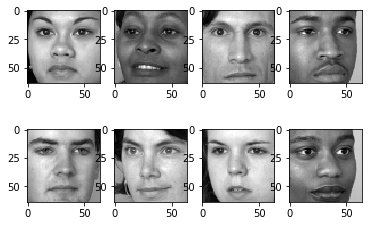

In [4]:
image_batch = next(iter(trainloader))
for tmpC1 in range(8):    
    img = image_batch[tmpC1].numpy()
    plt.subplot(2,4,tmpC1+1)
    plt.imshow(img.reshape([64,64]), cmap = 'gray')

Text(0,0.5,'Loss')

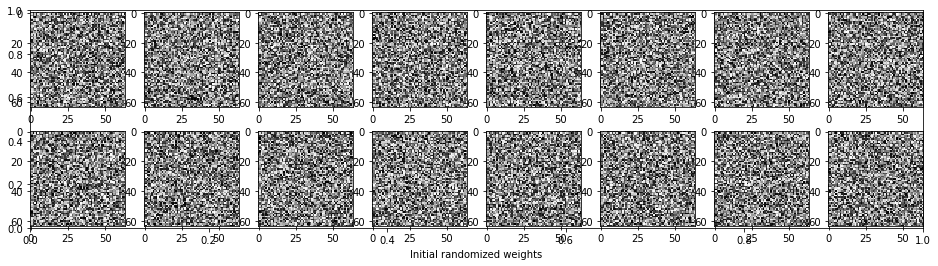

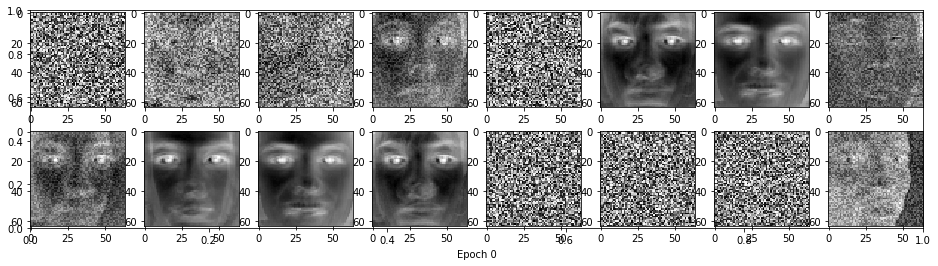

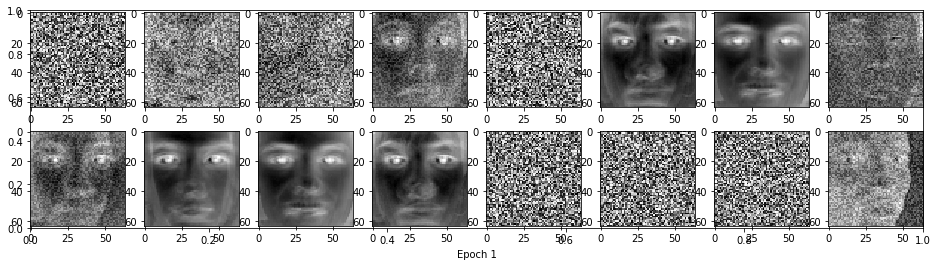

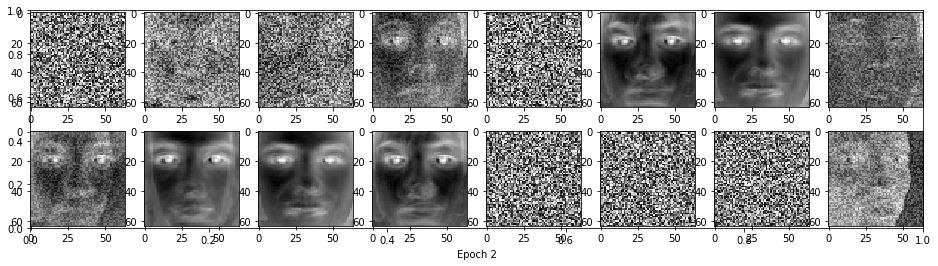

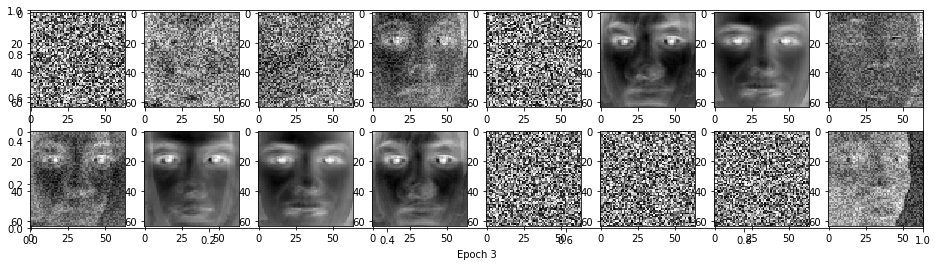

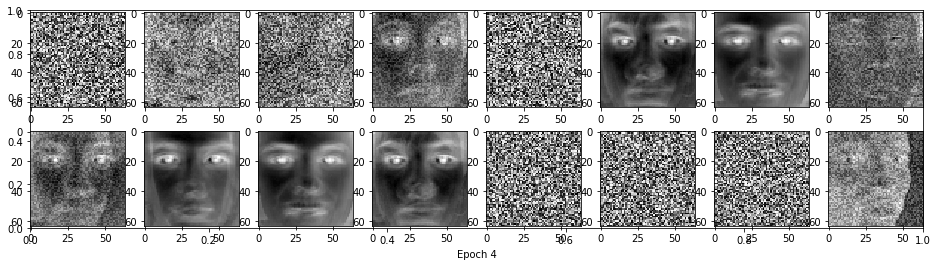

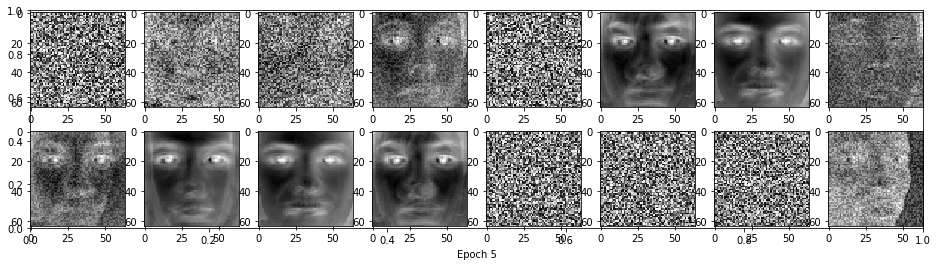

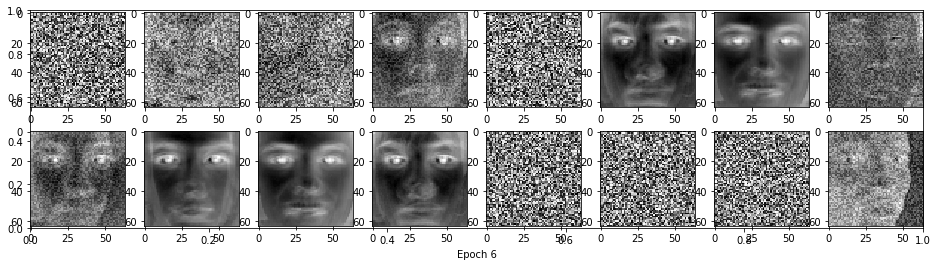

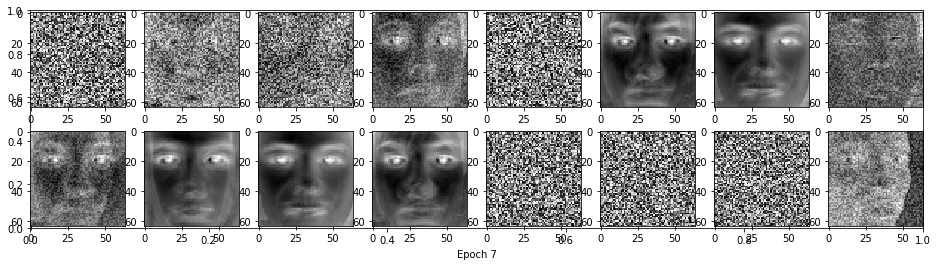

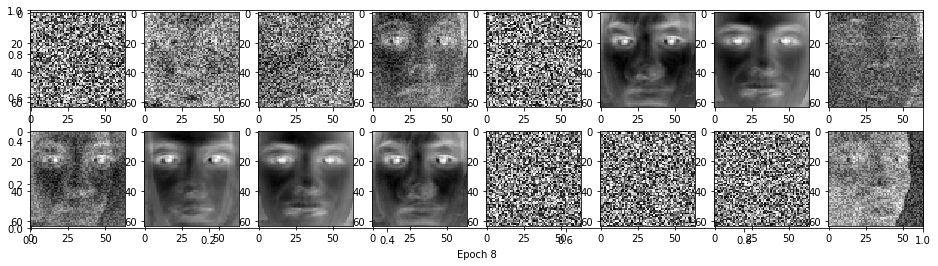

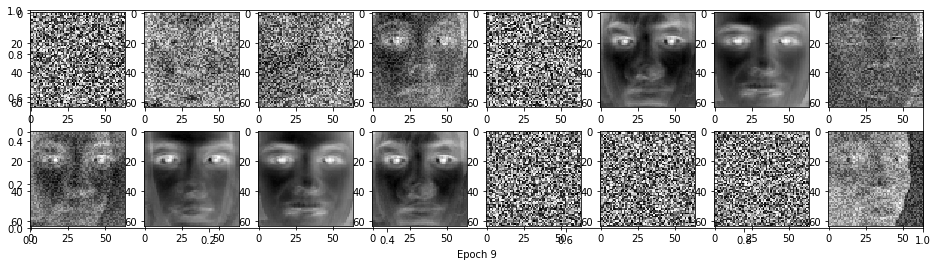

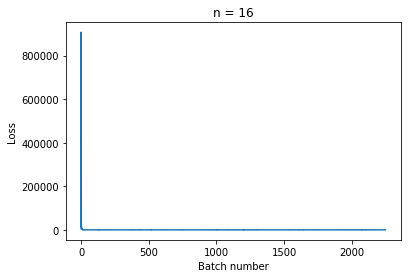

In [7]:
n= 16

class MLP(nn.Module):

    def __init__(self):
        super(MLP, self).__init__()
        
        inputSize= 4096
        hiddenSize = n
        outputSize = 4096
        # mapped to an n dimensional vector 
        self.linear1=nn.Linear(inputSize,hiddenSize)
        self.linear2=nn.Linear(hiddenSize,outputSize)

    def forward(self, x):
        # linear layer fc1
        x=self.linear1(x)
        # ReLU nonlinearity
        x=torch.relu(x)
        # Linear layer fc2
        x=self.linear2(x) 
        
        return x
    



def train_model(model, optimizer, dataloader, loss_fn, loss_logger,epochs):
   
    for iteration in range(epochs):
        for x in dataloader:
            y_predict = model(x)
            loss = loss_fn(y_predict,x)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_logger.append(loss.data.item())
            
        img_array=list(model.parameters())[0].data.numpy()
        img_array = img_array.reshape([-1,64,64])
        fig = plt.figure(figsize=(16,4))
        plt.xlabel("Epoch"+' ' +str(iteration))
            
        for img in range(16):
            sub = fig.add_subplot(2,8,img+1)
            sub.imshow(img_array[img],cmap = 'gray')
            

    return loss_logger

def model(dataset_train):
    learning_rate = 0.01   
    model = MLP()
    loss_fn = nn.MSELoss()
    img_array=list(model.parameters())[0].data.numpy()
    img_array = img_array.reshape([-1,64,64])
    fig = plt.figure(figsize=(16,4))
    plt.xlabel("Initial randomized weights")
    for i in range(16):
        sub = fig.add_subplot(2,8,i+1)
        sub.imshow(img_array[i], cmap = 'gray')
        
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    loss_fn = nn.MSELoss(reduction='sum')
    loss = train_model(model=model, optimizer= optimizer, dataloader=trainloader, loss_fn= loss_fn, loss_logger = loss_logger,epochs = 10)

    return loss

loss_logger = []   # Keep track of the loss values
acc = [] # Keep track of accuracy values
ImageData = FaceData()



losses = model(ImageData)
#Lets visualise an entire batch of images!
fig=plt.figure()
plt.title("n = "+str(n))
plt.plot(range(len(losses)),losses)
plt.xlabel('Batch number')
plt.ylabel('Loss')






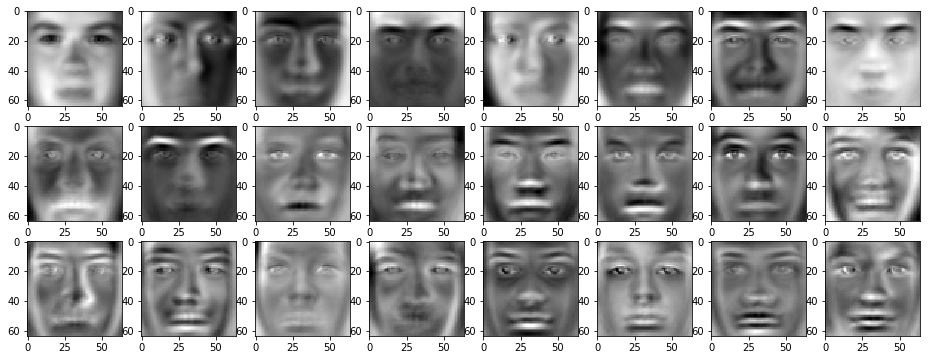